# League of Legends Match Analysis and Outcome Prediction

<p align="center">
<img src="https://cdnb.artstation.com/p/assets/images/images/057/829/091/large/imaginedai-glineni1-league-of-legends-yasuo-anime-style-98e4f05c-dfac-4787-82d4-927e232b67be.jpg?1672770719" self-aling="center" width=700> 
</p>

<span>
    EDA and building prediction model
</span>

## Table of Contents
<ul>
    <li>Imports</li>
    <li>Data load</li>
    <li>First View</li>
    <li>Exploratory Data Analisys</li>
    <li>Building prediction model</li>
</ul>

In [2]:
import os
import sqlalchemy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from dotenv import load_dotenv

# Seaborn style
sns.set_style("darkgrid")

# Load environment variables
dirname = os.getcwd()
dotenv_path = os.path.join(dirname, ".env")
load_dotenv(dotenv_path)

DATABASE_NAME = os.environ.get("DATABASE_NAME")
USER          = os.environ.get("USER")
PASSWORD      = os.environ.get("PASSWORD")
HOST          = os.environ.get("HOST")
PORT          = os.environ.get("PORT")

## Data load

In [3]:
db_connection_string = f"postgresql+psycopg2://{USER}:{PASSWORD}@{HOST}:{PORT}/{DATABASE_NAME}"
engine = sqlalchemy.create_engine(db_connection_string, echo=True)

champions_data = pd.read_sql("SELECT * FROM \"Champions\";", engine)
items_data = pd.read_sql("SELECT * FROM \"Items\";", engine)
match_info_data = pd.read_sql("SELECT * FROM \"MatchInfo\";", engine)
match_stats_data = pd.read_sql("SELECT * FROM \"MatchStats\";", engine)
ranks_data = pd.read_sql("SELECT * FROM \"Ranks\";", engine)
summoner_match_data = pd.read_sql("SELECT * FROM \"SummonerMatch\";", engine)
team_match_data = pd.read_sql("SELECT * FROM \"TeamMatch\";", engine)

print("Data loaded.")


2025-11-20 15:05:22,854 INFO sqlalchemy.engine.Engine select pg_catalog.version()
2025-11-20 15:05:22,855 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-11-20 15:05:22,856 INFO sqlalchemy.engine.Engine select current_schema()
2025-11-20 15:05:22,857 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-11-20 15:05:22,858 INFO sqlalchemy.engine.Engine show standard_conforming_strings
2025-11-20 15:05:22,858 INFO sqlalchemy.engine.Engine [raw sql] {}
2025-11-20 15:05:22,861 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2025-11-20 15:05:22,862 INFO sqlalchemy.engine.Engine SELECT pg_catalog.pg_class.relname 
FROM pg_catalog.pg_class JOIN pg_catalog.pg_namespace ON pg_catalog.pg_namespace.oid = pg_catalog.pg_class.relnamespace 
WHERE pg_catalog.pg_class.relname = %(table_name)s AND pg_catalog.pg_class.relkind = ANY (ARRAY[%(param_1)s, %(param_2)s, %(param_3)s, %(param_4)s, %(param_5)s]) AND pg_catalog.pg_table_is_visible(pg_catalog.pg_class.oid) AND pg_catalog.pg_namespace.nspname != %(nspname

## First View

### Champions
Contains two cols:
- ChampionId
- ChampionName

In [4]:
champions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ChampionId    172 non-null    int64 
 1   ChampionName  172 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.8+ KB


In [5]:
champions_data.describe()

,ChampionId
count,172.000000
mean,198.133721
std,248.125298
min,0.000000
25%,42.750000
50%,101.500000
75%,233.250000
max,950.000000


In [6]:
champions_data.head(10)

,ChampionId,ChampionName
0,0,No Champion
1,1,Annie
2,2,Olaf
3,3,Galio
4,4,TwistedFate
5,5,XinZhao
6,6,Urgot
7,7,Leblanc
8,8,Vladimir
9,9,Fiddlesticks


### Items
Contains two cols:
- ItemID
- ItemName

In [7]:
items_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 635 entries, 0 to 634
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ItemID    635 non-null    int64 
 1   ItemName  635 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


In [8]:
items_data.describe()

,ItemID
count,635.000000
mean,122553.592126
std,167623.561824
min,1001.000000
25%,3112.500000
50%,6698.000000
75%,223159.500000
max,667666.000000


In [9]:
items_data.head(10)

,ItemID,ItemName
0,1001,Boots
1,1004,Faerie Charm
2,1006,Rejuvenation Bead
3,1011,Giant's Belt
4,1018,Cloak of Agility
5,1026,Blasting Wand
6,1027,Sapphire Crystal
7,1028,Ruby Crystal
8,1029,Cloth Armor
9,1031,Chain Vest


### Ranks
Contains two cols:
- RankId
- RankName

In [10]:
ranks_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RankId    11 non-null     int64 
 1   RankName  11 non-null     object
dtypes: int64(1), object(1)
memory usage: 308.0+ bytes


In [11]:
ranks_data.describe()

,RankId
count,11.000000
mean,5.000000
std,3.316625
min,0.000000
25%,2.500000
50%,5.000000
75%,7.500000
max,10.000000


In [12]:
ranks_data.head(11)

,RankId,RankName
0,0,Unranked
1,1,Iron
2,2,Bronze
3,3,Silver
4,4,Gold
5,5,Platinum
6,6,Emerald
7,7,Diamond
8,8,Master
9,9,Grandmaster


### MatchInfo
Contains match meta info:
- MatchId
- Patch - in which patch this match was played
- QueueType - queue type, like "classic", "aram" and others
- RankFk - match rank
- Game Duration - in seconds

In [13]:
match_info_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35421 entries, 0 to 35420
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   MatchId       35421 non-null  object
 1   Patch         35421 non-null  object
 2   QueueType     35421 non-null  object
 3   RankFk        35421 non-null  int64 
 4   GameDuration  35421 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 1.4+ MB


In [14]:
match_info_data.head()

,MatchId,Patch,QueueType,RankFk,GameDuration
0,EUW1_6681382047,13.22.541.9804,CLASSIC,0,1050
1,EUW1_6681412019,13.22.541.9804,CLASSIC,0,778
2,EUW1_6681445530,13.22.541.9804,ARAM,0,753
3,EUW1_6681464371,13.22.541.9804,ARAM,0,853
4,EUW1_6681718380,13.22.541.9804,ARAM,0,1226


In [15]:
match_info_data.describe()

,RankFk,GameDuration
count,35421.000000,35421.000000
mean,5.741227,1593.750487
std,2.719838,423.024305
min,0.000000,14.000000
25%,4.000000,1376.000000
50%,6.000000,1597.000000
75%,8.000000,1824.000000
max,10.000000,6020.000000


### MatchStats
- MatchStatsId
- SummonerMatchFk - summoner id
- MinionsKilled 
- DmgDealt
- DmgTaken
- TurretDamage
- TotalGold
- Lane
- Win,
- item1-item6 - item ids
- kills, deaths, asists
- PrimaryKeyStone, PrimarySlot1-2, SecondarySlot1-2 - pre-match champion talent system
- SummonerSpell1-2 - pre-match spells
- CurrentMasteryPoints
- EnemyChampionFk - enemy champion foreign key
- DragonKills
- BaronKills
- visionScore - ward, vision, travel through fog-of-war

In [16]:
match_stats_data.columns

Index(['MatchStatsId', 'SummonerMatchFk', 'MinionsKilled', 'DmgDealt',
       'DmgTaken', 'TurretDmgDealt', 'TotalGold', 'Lane', 'Win', 'item1',
       'item2', 'item3', 'item4', 'item5', 'item6', 'kills', 'deaths',
       'assists', 'PrimaryKeyStone', 'PrimarySlot1', 'PrimarySlot2',
       'PrimarySlot3', 'SecondarySlot1', 'SecondarySlot2', 'SummonerSpell1',
       'SummonerSpell2', 'CurrentMasteryPoints', 'EnemyChampionFk',
       'DragonKills', 'BaronKills', 'visionScore'],
      dtype='object')

In [17]:
match_stats_data.describe().T

,count,mean,std,min,25%,50%,75%,max
MatchStatsId,78863.0,39432.000000,22765.931477,1.0,19716.5,39432.0,59147.5,78863.0
SummonerMatchFk,78863.0,39422.898431,22766.335105,1.0,19698.0,39414.0,59136.5,78853.0
MinionsKilled,78863.0,103.865438,92.905935,0.0,18.0,79.0,188.0,501.0
DmgDealt,78863.0,26311.801618,18478.868106,0.0,13601.5,22424.0,34055.0,314904.0
DmgTaken,78863.0,30430.417623,18542.699251,0.0,18966.5,26852.0,37696.0,435808.0
TurretDmgDealt,78863.0,1.711893,1.982145,0.0,0.0,1.0,3.0,12.0
TotalGold,78863.0,12350.632083,4665.560563,500.0,9299.0,11969.0,15013.0,48226.0
Win,78863.0,0.512078,0.499857,0.0,0.0,1.0,1.0,1.0
item1,78863.0,49462.604250,112486.934651,0.0,3009.0,3156.0,6655.0,447123.0
item2,78863.0,46557.873046,106054.833029,0.0,3036.0,3153.0,6657.0,447123.0


In [18]:
match_stats_data.head()

,MatchStatsId,SummonerMatchFk,MinionsKilled,DmgDealt,DmgTaken,TurretDmgDealt,TotalGold,Lane,Win,item1,...,PrimarySlot3,SecondarySlot1,SecondarySlot2,SummonerSpell1,SummonerSpell2,CurrentMasteryPoints,EnemyChampionFk,DragonKills,BaronKills,visionScore
0,1,1,30,4765,12541,0,7058,BOTTOM,0,3870,...,8453,8345,8347,4,7,902,51,0,0,67
1,2,2,29,8821,14534,1,9618,BOTTOM,0,3870,...,8453,8345,8347,4,7,902,236,0,0,88
2,3,3,34,6410,19011,3,9877,BOTTOM,1,3870,...,8237,8345,8347,4,7,16,498,0,0,97
3,4,4,51,22206,14771,3,12374,NONE,1,6655,...,8106,8226,8210,4,14,103,54,0,0,0
4,5,5,0,39106,33572,0,15012,TOP,1,4015,...,0,0,0,2202,2201,800,12,0,0,0


### SummonerMatch
Contains info about summoners' matches
- SummonerMatchId
- SummonerFk
- MatchFk
- ChampionFk

In [19]:
summoner_match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78863 entries, 0 to 78862
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SummonerMatchId  78863 non-null  int64 
 1   SummonerFk       78863 non-null  int64 
 2   MatchFk          78863 non-null  object
 3   ChampionFk       78863 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.4+ MB


In [20]:
summoner_match_data.describe()

,SummonerMatchId,SummonerFk,ChampionFk
count,78863.000000,78863.000000,78863.000000
mean,39432.000000,1171.377604,206.193525
std,22765.931477,679.914013,251.142166
min,1.000000,1.000000,1.000000
25%,19716.500000,584.000000,45.000000
50%,39432.000000,1168.000000,106.000000
75%,59147.500000,1746.500000,236.000000
max,78863.000000,2381.000000,950.000000


In [21]:
summoner_match_data.head()

,SummonerMatchId,SummonerFk,MatchFk,ChampionFk
0,1,1,EUW1_7565751492,902
1,2,1,EUW1_7565549583,902
2,3,1,EUW1_7564803077,16
3,4,1,EUW1_7564368646,103
4,5,1,EUW1_7564332041,800


### TeamMatch
Match summary over both teams

In [22]:
team_match_data.columns

Index(['TeamID', 'MatchFk', 'B1Champ', 'B2Champ', 'B3Champ', 'B4Champ',
       'B5Champ', 'R1Champ', 'R2Champ', 'R3Champ', 'R4Champ', 'R5Champ',
       'BlueBaronKills', 'BlueRiftHeraldKills', 'BlueDragonKills',
       'BlueTowerKills', 'BlueKills', 'RedBaronKills', 'RedRiftHeraldKills',
       'RedDragonKills', 'RedTowerKills', 'RedKills', 'RedWin', 'BlueWin'],
      dtype='object')

In [23]:
team_match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35045 entries, 0 to 35044
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   TeamID               35045 non-null  int64 
 1   MatchFk              35045 non-null  object
 2   B1Champ              35045 non-null  int64 
 3   B2Champ              35045 non-null  int64 
 4   B3Champ              35045 non-null  int64 
 5   B4Champ              35045 non-null  int64 
 6   B5Champ              35045 non-null  int64 
 7   R1Champ              35045 non-null  int64 
 8   R2Champ              35045 non-null  int64 
 9   R3Champ              35045 non-null  int64 
 10  R4Champ              35045 non-null  int64 
 11  R5Champ              35045 non-null  int64 
 12  BlueBaronKills       35045 non-null  int64 
 13  BlueRiftHeraldKills  35045 non-null  int64 
 14  BlueDragonKills      35045 non-null  int64 
 15  BlueTowerKills       35045 non-null  int64 
 16  Blue

In [24]:
team_match_data.describe()

,TeamID,B1Champ,B2Champ,B3Champ,B4Champ,B5Champ,R1Champ,R2Champ,R3Champ,R4Champ,...,BlueDragonKills,BlueTowerKills,BlueKills,RedBaronKills,RedRiftHeraldKills,RedDragonKills,RedTowerKills,RedKills,RedWin,BlueWin
count,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,...,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000,35045.000000
mean,17523.000000,203.134028,171.596918,206.927493,222.528749,227.452989,193.545499,170.199030,208.458125,224.589385,...,1.214296,4.402197,37.409816,0.269396,0.272963,1.394807,4.264489,27.525753,0.404651,0.595149
std,10116.764428,269.008242,208.218431,263.391483,259.808374,244.008264,259.368788,207.583516,264.565102,262.869265,...,1.362277,3.877041,17.851835,0.524636,0.445489,1.464232,3.860901,20.208222,0.490831,0.490870
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8762.000000,39.000000,56.000000,45.000000,51.000000,50.000000,39.000000,56.000000,45.000000,51.000000,...,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000
50%,17523.000000,86.000000,106.000000,103.000000,121.000000,114.000000,86.000000,104.000000,103.000000,119.000000,...,1.000000,4.000000,36.000000,0.000000,0.000000,1.000000,4.000000,28.000000,0.000000,1.000000
75%,26284.000000,222.000000,233.000000,233.000000,235.000000,412.000000,166.000000,233.000000,234.000000,235.000000,...,2.000000,8.000000,50.000000,0.000000,1.000000,3.000000,8.000000,40.000000,1.000000,1.000000
max,35045.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,...,7.000000,21.000000,124.000000,5.000000,1.000000,8.000000,20.000000,136.000000,1.000000,1.000000


## Exploratory Data Analysis
Now, let's do some analysis. We'll be join several table to get complete picture of data.

#### Data joining
First of all, lets join all data which we have. We'll start with MatchStats

In [25]:
dataset = match_stats_data.copy()
dataset.columns, f"Rows and cols: {dataset.shape}"

(Index(['MatchStatsId', 'SummonerMatchFk', 'MinionsKilled', 'DmgDealt',
        'DmgTaken', 'TurretDmgDealt', 'TotalGold', 'Lane', 'Win', 'item1',
        'item2', 'item3', 'item4', 'item5', 'item6', 'kills', 'deaths',
        'assists', 'PrimaryKeyStone', 'PrimarySlot1', 'PrimarySlot2',
        'PrimarySlot3', 'SecondarySlot1', 'SecondarySlot2', 'SummonerSpell1',
        'SummonerSpell2', 'CurrentMasteryPoints', 'EnemyChampionFk',
        'DragonKills', 'BaronKills', 'visionScore'],
       dtype='object'),
 'Rows and cols: (78863, 31)')

In [ ]:
dataset = dataset.merge(
    summoner_match_data,
    how="left",
    left_on="SummonerMatchFk",
    right_on="SummonerMatchId"
).drop(["SummonerMatchFk", "SummonerMatchId"], axis=1)

dataset = dataset.merge(
    match_info_data,
    how="left",
    left_on="MatchFk",
    right_on="MatchId"
).drop(["MatchId"], axis=1)

dataset = dataset.merge(
    team_match_data, 
    how="left",
    on="MatchFk",
).drop(["MatchFk"], axis=1)

# # Iterate over team record champions
# for side in ["B", "R"]:
#     for i in range(5):
#         dataset = dataset.merge(
#             champions_data,
#             how="left",
#             left_on=f"{side}{i+1}Champ",
#             right_on="ChampionId",
#             suffixes=(None, "_team")
#         ).drop([f"{side}{i+1}Champ", "ChampionId"], axis=1)\
#         .rename(
#             columns={
#                 "ChampionName_team": f"{side}{i+1}ChampName"
#             }
#         )

dataset.columns, f"Rows and cols: {dataset.shape}"

(Index(['MatchStatsId', 'MinionsKilled', 'DmgDealt', 'DmgTaken',
        'TurretDmgDealt', 'TotalGold', 'Lane', 'Win', 'item1', 'item2', 'item3',
        'item4', 'item5', 'item6', 'kills', 'deaths', 'assists',
        'PrimaryKeyStone', 'PrimarySlot1', 'PrimarySlot2', 'PrimarySlot3',
        'SecondarySlot1', 'SecondarySlot2', 'SummonerSpell1', 'SummonerSpell2',
        'CurrentMasteryPoints', 'EnemyChampionFk', 'DragonKills', 'BaronKills',
        'visionScore', 'SummonerFk', 'ChampionFk', 'Patch', 'QueueType',
        'RankFk', 'GameDuration', 'TeamID', 'B1Champ', 'B2Champ', 'B3Champ',
        'B4Champ', 'B5Champ', 'R1Champ', 'R2Champ', 'R3Champ', 'R4Champ',
        'R5Champ', 'BlueBaronKills', 'BlueRiftHeraldKills', 'BlueDragonKills',
        'BlueTowerKills', 'BlueKills', 'RedBaronKills', 'RedRiftHeraldKills',
        'RedDragonKills', 'RedTowerKills', 'RedKills', 'RedWin', 'BlueWin'],
       dtype='object'),
 'Rows and cols: (78863, 59)')

There is no need to merge with named table, since we will build a model with categorical columns (not names, but ids)

Rearanging column order for comfort

In [27]:
dataset = dataset[[
    'MatchStatsId',
    'Patch', 
    'QueueType', 
    'GameDuration', 
    'RankFk',
    'SummonerFk',
    'ChampionFk',
    'MinionsKilled', 
    'DmgDealt', 
    'DmgTaken',
    'TurretDmgDealt', 
    'TotalGold',
    'Lane', 
    'Win', 
    'kills', 
    'deaths',
    'assists', 
    'item1', 
    'item2', 
    'item3',
    'item4', 
    'item5', 
    'item6', 
    'PrimaryKeyStone', 
    'PrimarySlot1', 
    'PrimarySlot2',
    'PrimarySlot3', 
    'SecondarySlot1', 
    'SecondarySlot2', 
    'SummonerSpell1',
    'SummonerSpell2', 
    'CurrentMasteryPoints', 
    'EnemyChampionFk',
    'DragonKills', 
    'BaronKills', 
    'visionScore',
    'TeamID', 
    'B1Champ', 
    'B2Champ', 
    'B3Champ', 
    'B4Champ',
    'B5Champ',
    'R1Champ', 
    'R2Champ', 
    'R3Champ',
    'R4Champ', 
    'R5Champ', 
    'BlueBaronKills',
    'BlueRiftHeraldKills', 
    'BlueDragonKills', 
    'BlueTowerKills', 
    'BlueKills',
    'RedBaronKills', 
    'RedRiftHeraldKills', 
    'RedDragonKills',
    'RedTowerKills', 
    'RedKills', 
    'RedWin', 
    'BlueWin',
]]

dataset.columns, f"Rows and cols: {dataset.shape}"

(Index(['MatchStatsId', 'Patch', 'QueueType', 'GameDuration', 'RankFk',
        'SummonerFk', 'ChampionFk', 'MinionsKilled', 'DmgDealt', 'DmgTaken',
        'TurretDmgDealt', 'TotalGold', 'Lane', 'Win', 'kills', 'deaths',
        'assists', 'item1', 'item2', 'item3', 'item4', 'item5', 'item6',
        'PrimaryKeyStone', 'PrimarySlot1', 'PrimarySlot2', 'PrimarySlot3',
        'SecondarySlot1', 'SecondarySlot2', 'SummonerSpell1', 'SummonerSpell2',
        'CurrentMasteryPoints', 'EnemyChampionFk', 'DragonKills', 'BaronKills',
        'visionScore', 'TeamID', 'B1Champ', 'B2Champ', 'B3Champ', 'B4Champ',
        'B5Champ', 'R1Champ', 'R2Champ', 'R3Champ', 'R4Champ', 'R5Champ',
        'BlueBaronKills', 'BlueRiftHeraldKills', 'BlueDragonKills',
        'BlueTowerKills', 'BlueKills', 'RedBaronKills', 'RedRiftHeraldKills',
        'RedDragonKills', 'RedTowerKills', 'RedKills', 'RedWin', 'BlueWin'],
       dtype='object'),
 'Rows and cols: (78863, 59)')

### Deep dive in data
So, let's extract some information from our data

In [109]:
pd.DataFrame(dataset["Patch"].value_counts().sort_values(ascending=False)).reset_index().head(10).style.set_caption("Top 10 most-played patches")

,Patch,count
0,15.20.719.545,39784
1,15.20.717.2831,23068
2,15.19.715.1836,5714
3,15.18.710.2811,2019
4,15.17.708.5788,984
5,15.13.693.4876,498
6,15.15.701.6241,363
7,15.19.713.5912,351
8,15.16.704.6097,306
9,14.24.644.2327,304


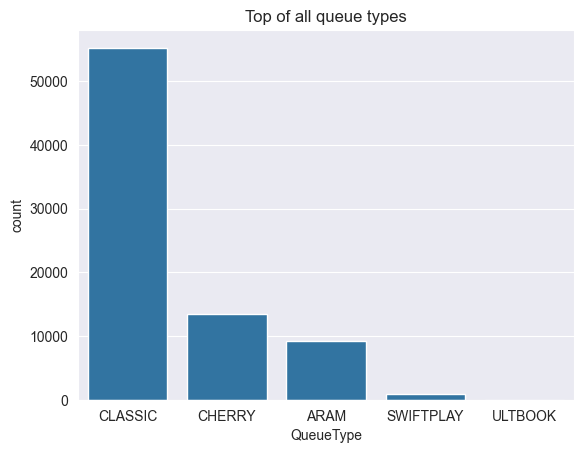

In [110]:
ax = sns.barplot(pd.DataFrame(dataset["QueueType"].value_counts().sort_values(ascending=False)).reset_index(), x="QueueType", y="count")
ax.set_title("Top of all queue types")
plt.show()

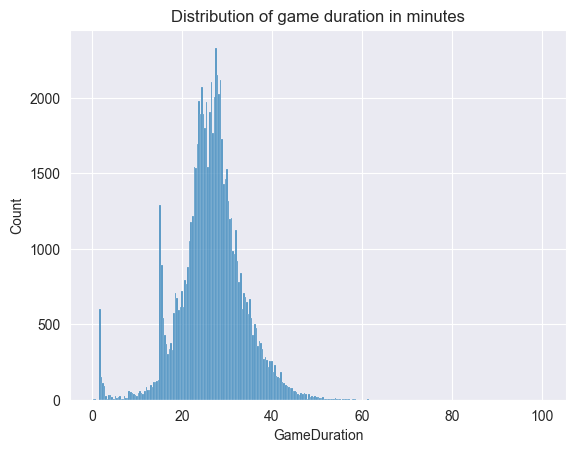

In [111]:
ax = sns.histplot(dataset["GameDuration"]/60)
ax.set_title("Distribution of game duration in minutes")
plt.show()

Let's show quantiles

In [112]:
pd.DataFrame({
    "0%": [dataset["GameDuration"].quantile(0)],
    "25%": [dataset["GameDuration"].quantile(.25)],
    "50%": [dataset["GameDuration"].quantile(.50)],
    "75%": [dataset["GameDuration"].quantile(.75)],
    "100%": [dataset["GameDuration"].quantile(1)],
    "min": [dataset["GameDuration"].min()],
    "median": [dataset["GameDuration"].median()],
    "max": [dataset["GameDuration"].max()]
})

,0%,25%,50%,75%,100%,min,median,max
0,14.0,1381.0,1600.0,1824.0,6020.0,14,1600.0,6020


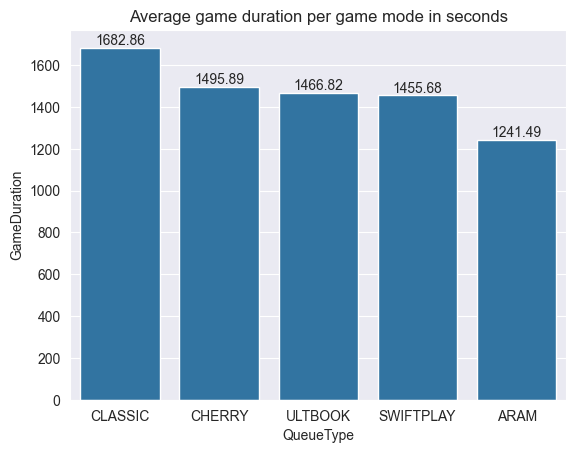

In [113]:
ax = sns.barplot(pd.DataFrame(dataset.groupby("QueueType").agg({"GameDuration": "mean"}).sort_values(ascending=False, by="GameDuration")), x="QueueType", y="GameDuration")
ax.bar_label(ax.containers[0])
ax.set_title("Average game duration per game mode in seconds")
plt.show()

Does there any relation between game duration and winning?

In [114]:
dataset.groupby("Win").agg({"GameDuration": "mean"})

,GameDuration
Win,
0,1600.345149
1,1593.138916


There is no such a big difference, isn't it?

Checking rank distribution

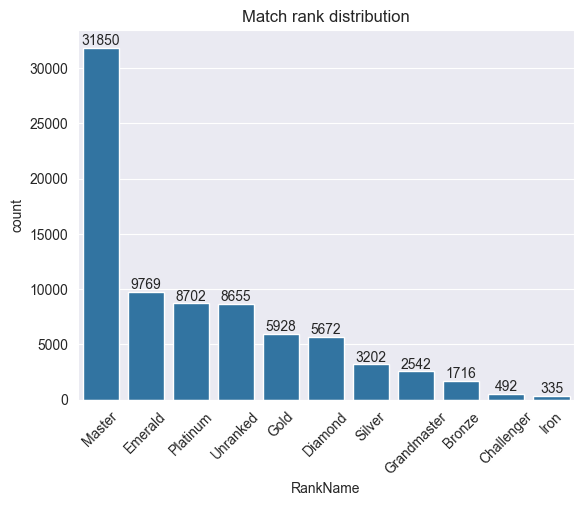

In [115]:
ax = sns.barplot(
    pd.DataFrame(
        dataset.merge(
            ranks_data,
            how="left",
            left_on="RankFk",
            right_on="RankId"
        ).drop(["RankFk", "RankId"], axis=1)["RankName"]\
        .value_counts(ascending=False)
    ),
    x="RankName",
    y="count"
)

ax.bar_label(ax.containers[0])
ax.set_title("Match rank distribution")
plt.xticks(rotation=45)
plt.show()

Checking mean performance metrics over players from different ranks.
(lets forget about unbalanced classes for a minute)

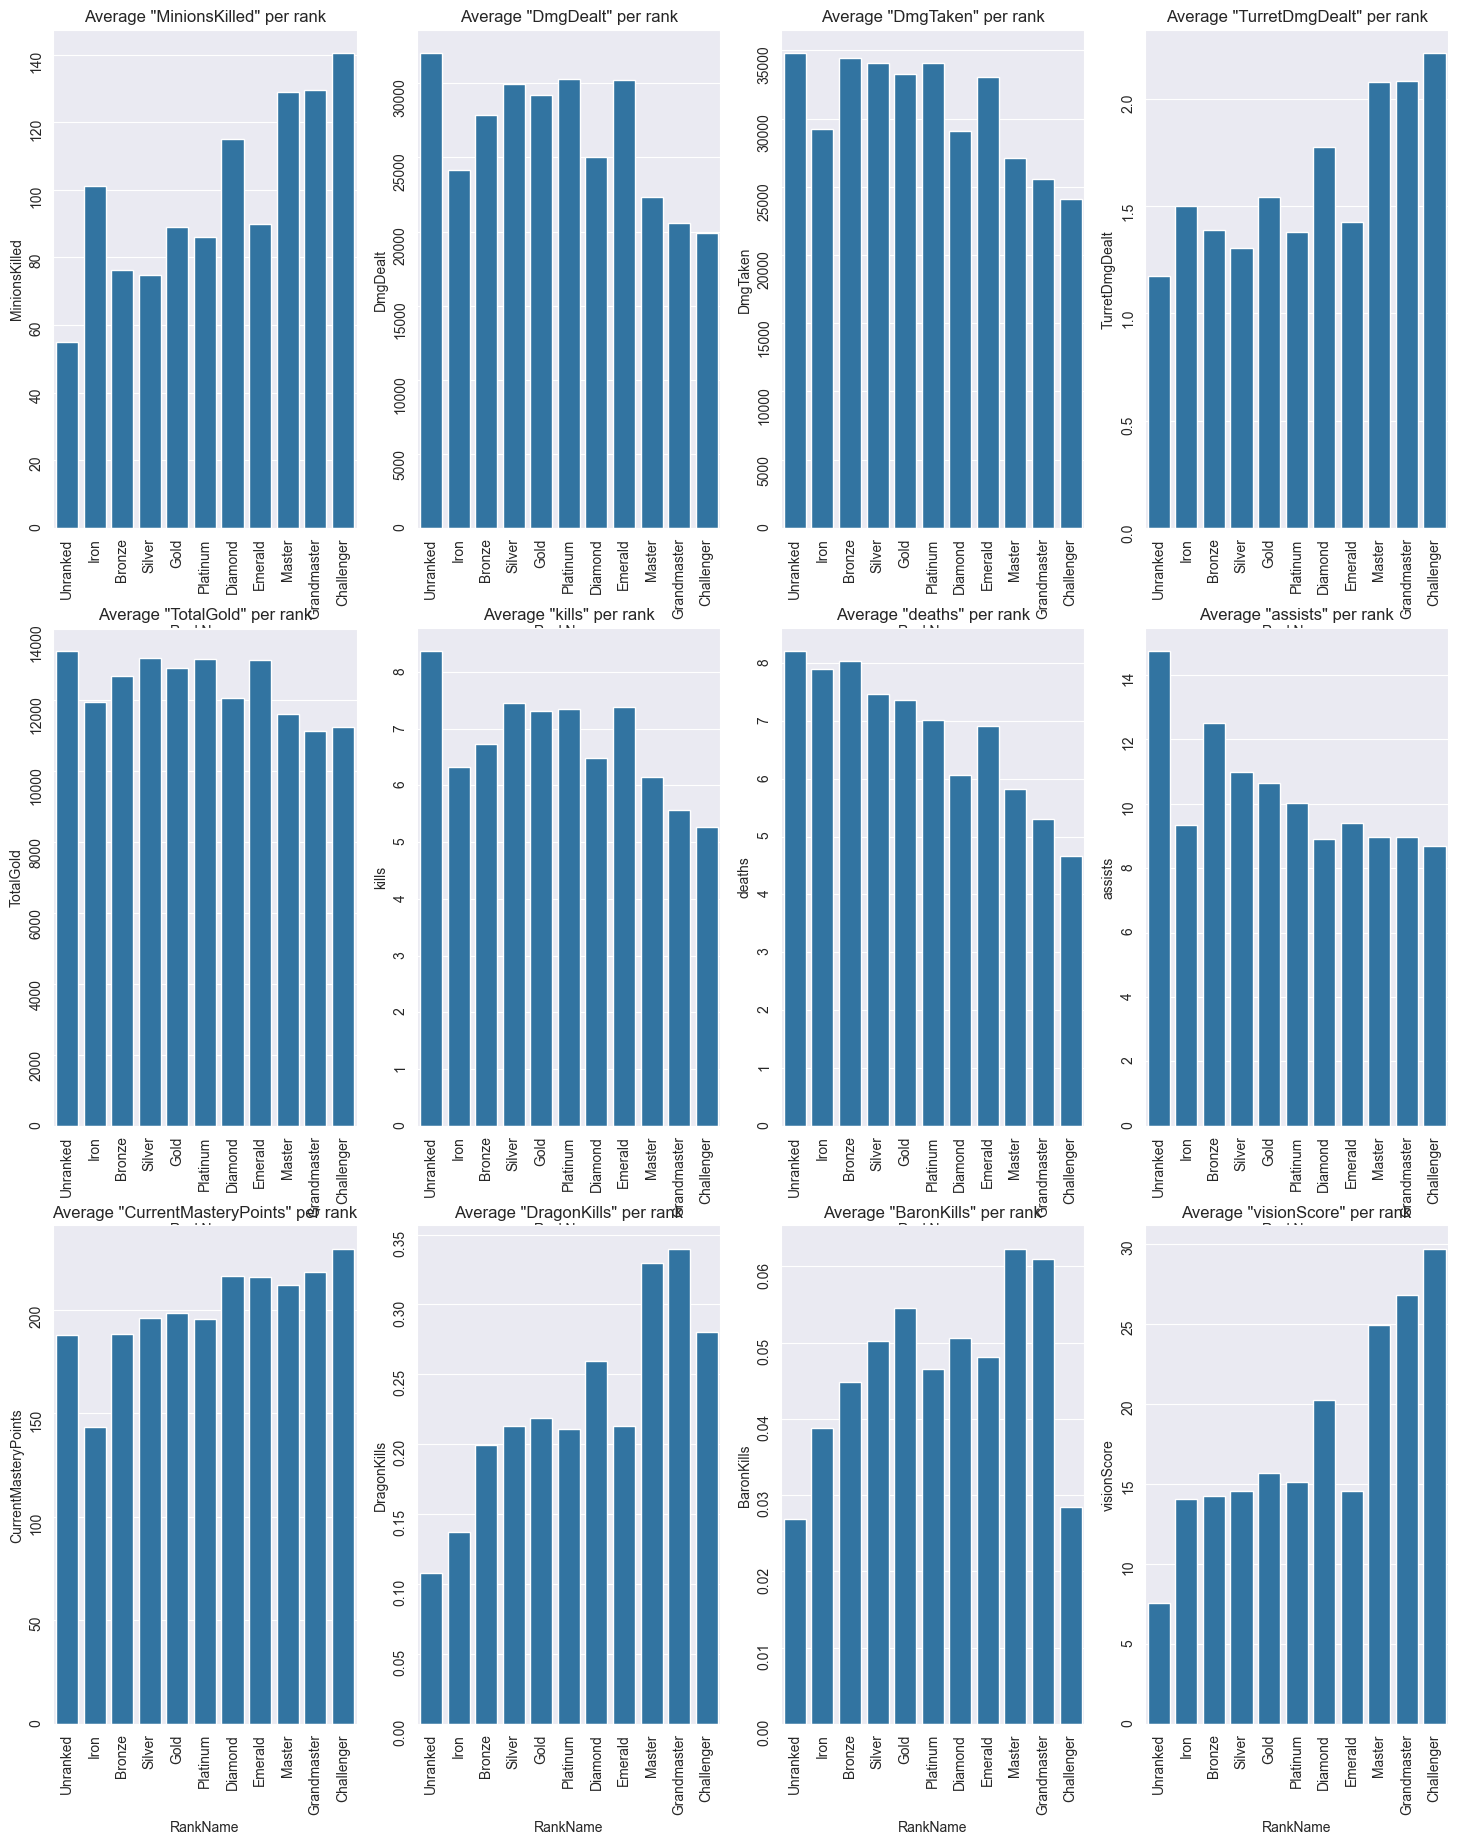

In [116]:
factors = [
    'MinionsKilled', 
    'DmgDealt', 
    'DmgTaken', 
    'TurretDmgDealt', 
    'TotalGold',
    'kills', 
    'deaths', 
    'assists', 
    'CurrentMasteryPoints', 
    'DragonKills', 
    'BaronKills', 
    'visionScore'
]

correct_rank_order_ascending = [
    "Unranked",
    "Iron",
    "Bronze",
    "Silver",
    "Gold",
    "Platinum",
    "Diamond",
    "Emerald",
    "Master",
    "Grandmaster",
    "Challenger"
]

fig, axs = plt.subplots(nrows=3, ncols=4)
fig.set_size_inches(18, 22)
for i, factor in enumerate(factors):
    row = i // 4
    col = i % 4
    axs[row][col].set_title(f"Average \"{factor}\" per rank")
    axs[row][col].tick_params(rotation=90)
    sns.barplot(
        pd.DataFrame(
            dataset.merge(
                ranks_data,
                how="left",
                left_on="RankFk",
                right_on="RankId"
            ).drop(["RankFk", "RankId"], axis=1)\
            .groupby("RankName")\
            .agg({f"{factor}": "mean"})\
            .reindex(correct_rank_order_ascending)
        ),
        x="RankName",
        y=factor,
        ax=axs[row][col]
    )
    

plt.show()

So we see, that with rank growth, there're:

ASCENDING:
- MinionsKilled
- TurretDamageDealt
- CurrentMasteryPoints
- DragonKills
- BaronKills
- visionScore
<br>Players are more skilled, so they perform better at this factors


DESCENDING:
- DamageTaken
- TotalGold
- Whole KDA

I have a theory:
<br>The better player, the higher rank. 
<br>The higher rank, the faster match finishes. 
<br>The faster match finishes, the less value we have at previous factors.
<br>Lets check this!

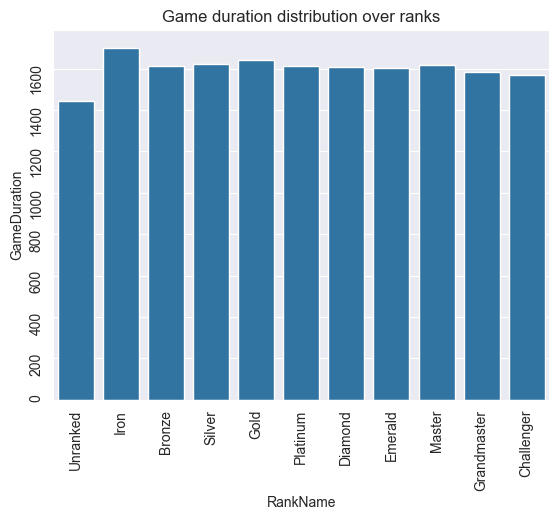

In [121]:
ax = sns.barplot(
    pd.DataFrame(
        dataset.merge(
            ranks_data,
            how="left",
            left_on="RankFk",
            right_on="RankId"
        ).drop(["RankFk", "RankId"], axis=1)\
        .groupby("RankName")\
        .agg({"GameDuration": "mean"})\
        .reindex(correct_rank_order_ascending)
    ),
    x="RankName",
    y="GameDuration",
)
ax.set_title("Game duration distribution over ranks")
ax.tick_params(rotation=90)
plt.show()

Not a big difference

Checking same factors distribution over win or lose

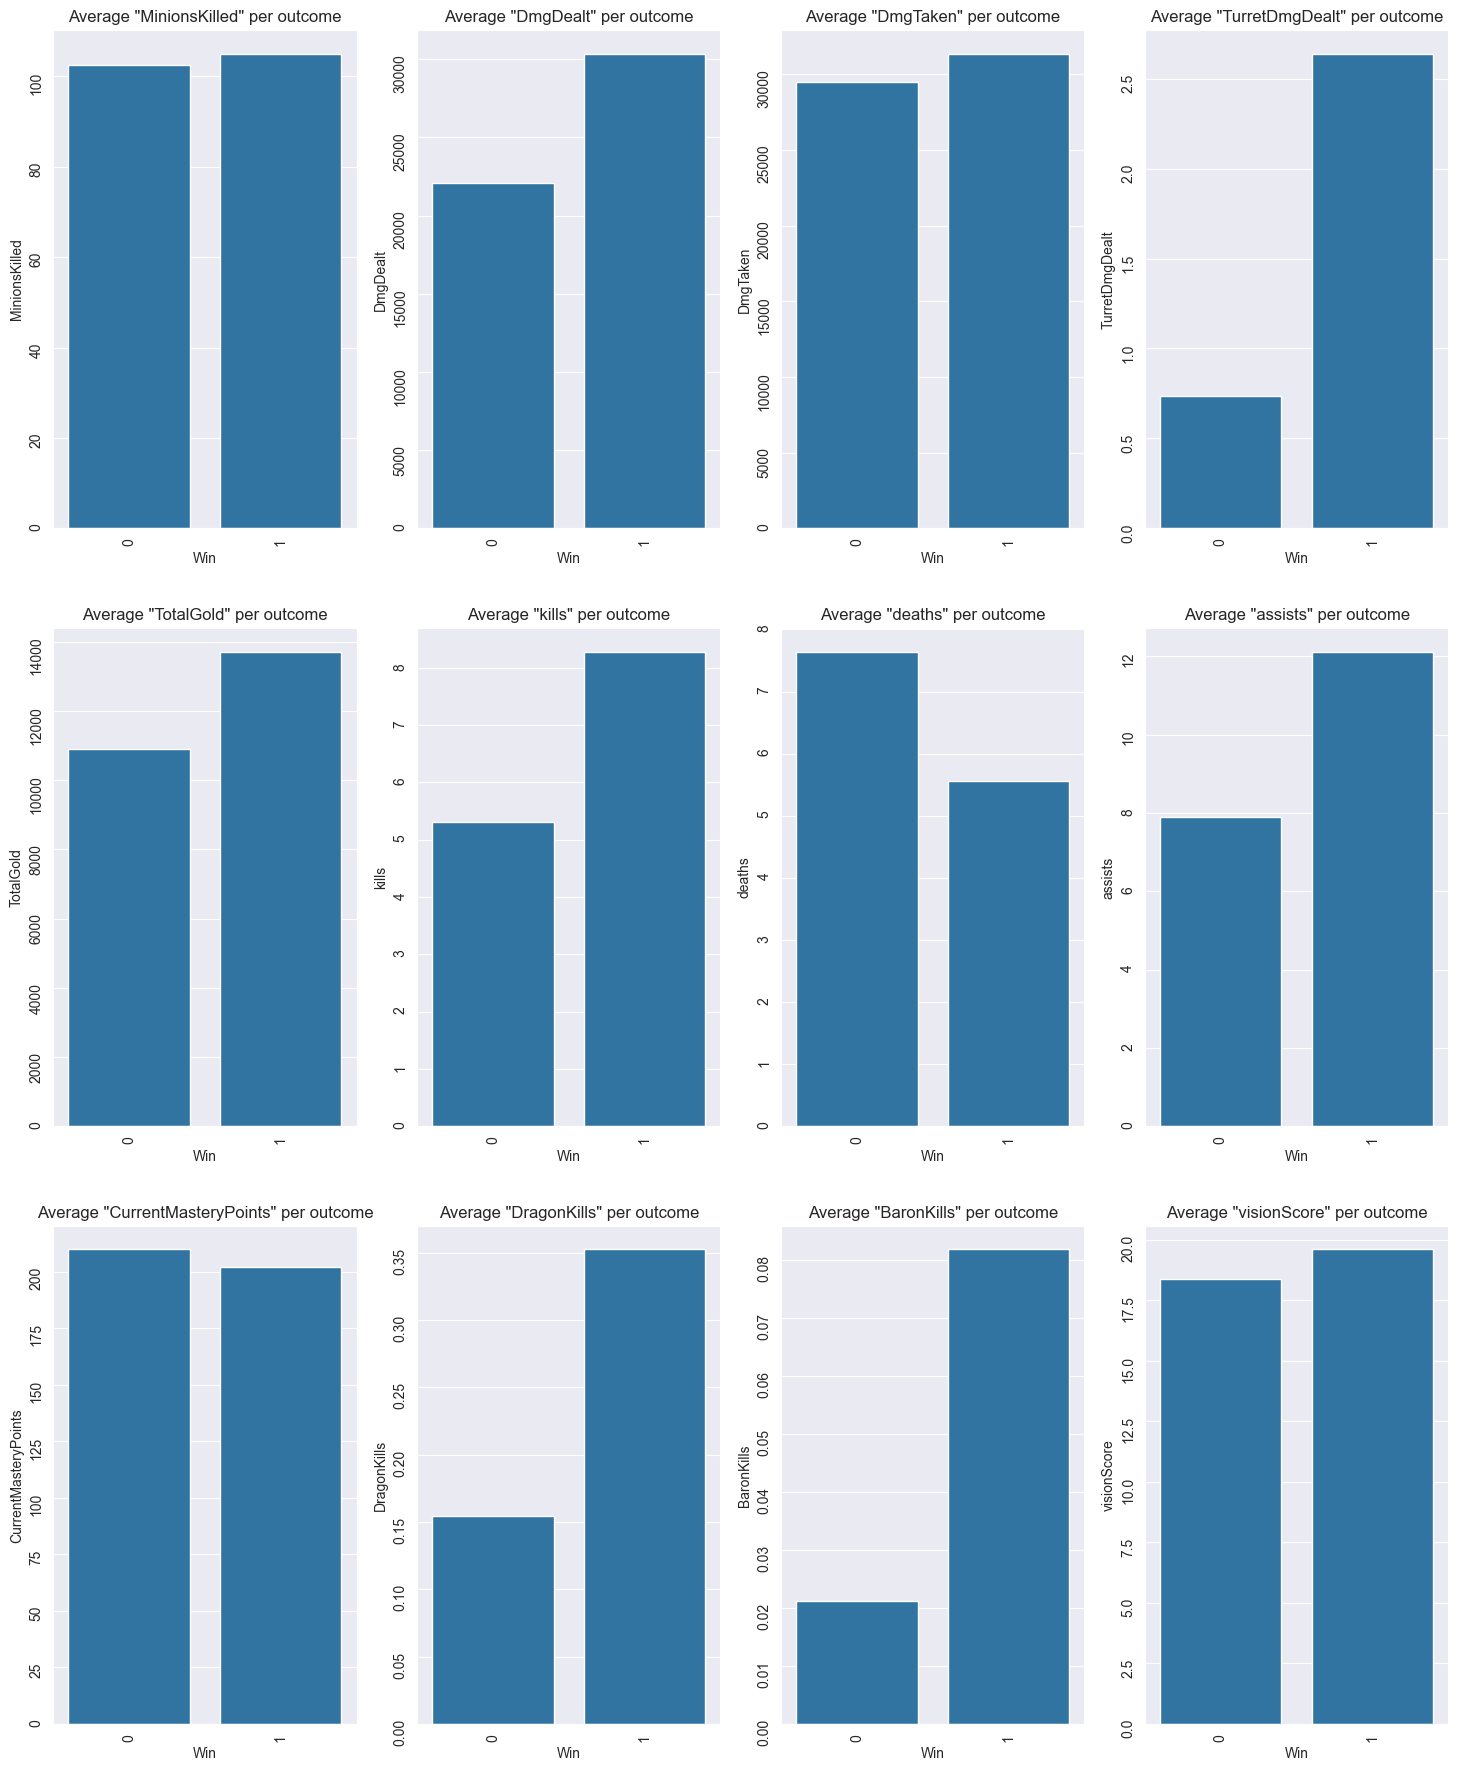

In [ ]:
factors = [
    'MinionsKilled', 
    'DmgDealt', 
    'DmgTaken', 
    'TurretDmgDealt', 
    'TotalGold',
    'kills', 
    'deaths', 
    'assists', 
    'CurrentMasteryPoints', 
    'DragonKills', 
    'BaronKills', 
    'visionScore'
]

fig, axs = plt.subplots(nrows=3, ncols=4)
fig.set_size_inches(18, 22)
for i, factor in enumerate(factors):
    row = i // 4
    col = i % 4
    axs[row][col].set_title(f"Average \"{factor}\" per outcome")
    axs[row][col].tick_params(rotation=90)
    sns.barplot(
        pd.DataFrame(
            dataset.groupby("Win")\
            .agg({f"{factor}": "mean"})
        ),
        x="Win",
        y=factor,
        ax=axs[row][col]
    )
    
plt.show()

Obvious outcome - almost every factor are better while winning

Let's check most popular champions

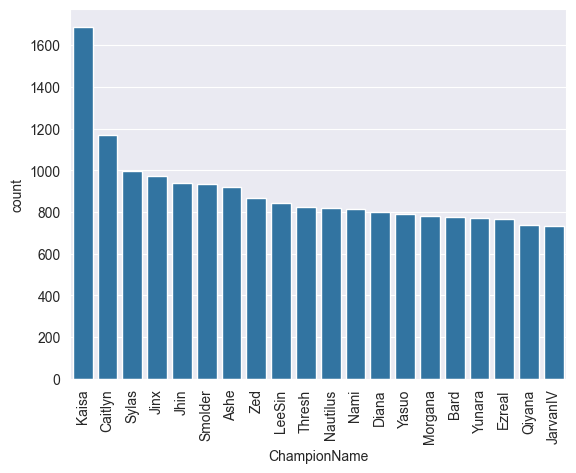

In [ ]:
sns.barplot(
    pd.DataFrame(dataset.merge(
        champions_data,
        how="left",
        left_on="ChampionFk",
        right_on="ChampionId"
    ).drop(["ChampionFk", "ChampionId"], axis=1)["ChampionName"]\
    .value_counts(ascending=False)
    ).head(20),
    x="ChampionName",
    y="count"
)
plt.xticks(rotation=90)
plt.show()

Check heroes' meta

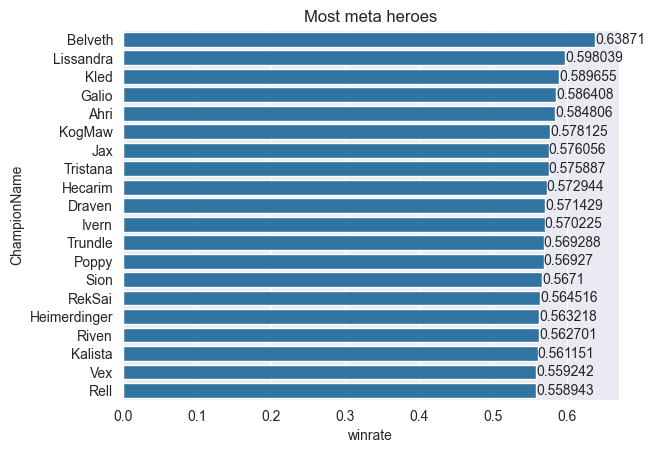

In [ ]:
champion_wins_and_loses = pd.pivot_table(
    pd.DataFrame(
        dataset.merge(
            champions_data,
            how="left",
            left_on="ChampionFk",
            right_on="ChampionId"
        ).drop(["ChampionFk", "ChampionId"], axis=1)
    ),
    values="deaths", # Doesnt matter, which "value" column we choose, anyway we just count values
    index="ChampionName",
    columns="Win",
    aggfunc="count"
).reset_index().rename(columns={0: "defeat", 1: "win"})

champion_wins_and_loses["winrate"] = champion_wins_and_loses["win"] / (champion_wins_and_loses["win"] + champion_wins_and_loses["defeat"])
champion_wins_and_loses = champion_wins_and_loses.sort_values(ascending=False, by="winrate")

ax = sns.barplot(champion_wins_and_loses.head(20), y="ChampionName", x="winrate")
ax.set_title("Most meta heroes")
ax.bar_label(ax.containers[0])
plt.show()


Then, lets check most popular items

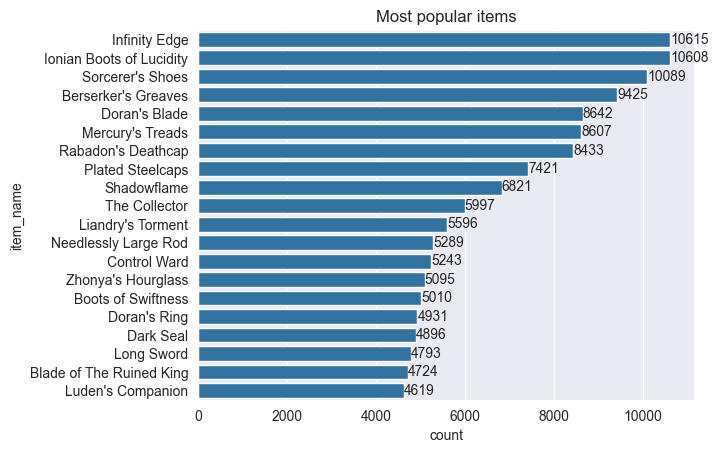

In [163]:
dataset_with_item_names = dataset.copy()

# Iterate over current summoner items
for i in range(6):
    dataset_with_item_names = dataset_with_item_names.merge(
        items_data,
        how="left",
        left_on=f"item{i+1}",
        right_on="ItemID"
    ).drop([f"item{i+1}", "ItemID"], axis=1)\
    .rename(
        columns={
            "ItemName": f"ItemName{i+1}"
        }
    )

item_series = [
    dataset_with_item_names["ItemName1"],
    dataset_with_item_names["ItemName2"],
    dataset_with_item_names["ItemName3"],
    dataset_with_item_names["ItemName4"],
    dataset_with_item_names["ItemName5"],
    dataset_with_item_names["ItemName6"],
]

all_item_slots_dataframe = pd.concat(item_series)

items_count_data = pd.DataFrame(all_item_slots_dataframe.value_counts().sort_values(ascending=False)).reset_index().rename(columns={"index": "item_name"})
ax = sns.barplot(items_count_data.head(20), x="count", y="item_name")
ax.set_title("Most popular items")
ax.bar_label(ax.containers[0])
plt.show()

Now checking most meta items

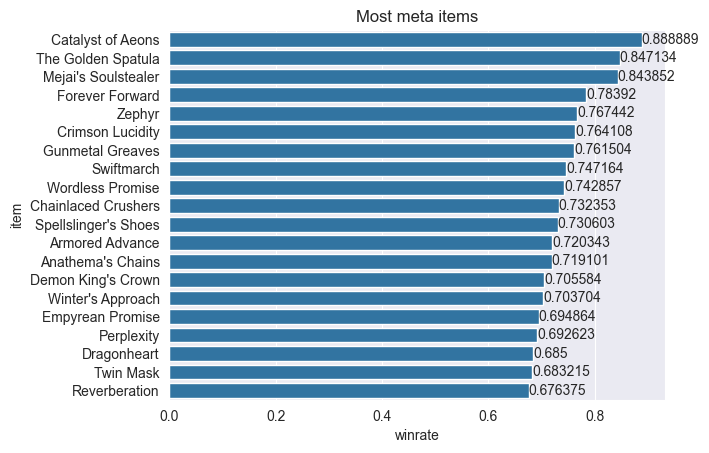

In [182]:
melted_dataset_with_item_names = dataset_with_item_names.melt(
    id_vars='Win', 
    value_vars=[
        'ItemName1', 
        'ItemName2', 
        'ItemName3',
        'ItemName4',
        'ItemName5',
        'ItemName6'
    ], 
    var_name='slot', 
    value_name='item'
)

melted_pivot_dataset_with_item_names = pd.pivot_table(
    melted_dataset_with_item_names,
    values="slot",
    index="item",
    columns="Win",
    aggfunc="count"
).rename(columns={0: "defeat", 1: "win"})


melted_pivot_dataset_with_item_names["winrate"] = melted_pivot_dataset_with_item_names["win"] / \
    (melted_pivot_dataset_with_item_names["win"] + melted_pivot_dataset_with_item_names["defeat"])

melted_pivot_dataset_with_item_names = melted_pivot_dataset_with_item_names.sort_values(ascending=False, by="winrate").fillna(0)

ax = sns.barplot(melted_pivot_dataset_with_item_names.head(20), x="winrate", y="item")
ax.set_title("Most meta items")
ax.bar_label(ax.containers[0])
plt.show()


Check lane distribution

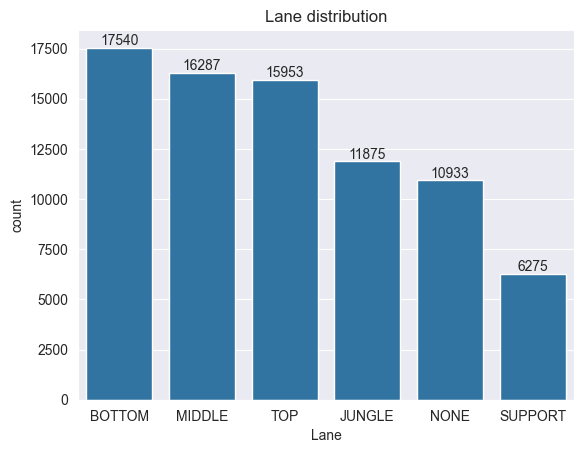

In [184]:
ax = sns.barplot(
    pd.DataFrame(
        dataset["Lane"].value_counts().sort_values(ascending=False)
    ), 
    x="Lane",
    y="count"
)
ax.set_title("Lane distribution")
ax.bar_label(ax.containers[0])
plt.show()

Team score stats

In [ ]:
# for example difference of dragon or herald kills between winner and loser
# ...